In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
df = pd.read_csv('KwhConsumptionBlower78_1.csv')
df = df[['TxnDate', 'TxnTime', 'Consumption']]
df.rename(columns={'TxnDate': 'date', 'TxnTime': 'time', 'Consumption': 'consumption'}, inplace=True)
df

,date,time,consumption
0,01 Jan 2022,16:55:52,1.010
1,01 Jan 2022,21:45:29,0.908
2,01 Jan 2022,12:24:52,0.926
3,01 Jan 2022,04:07:36,0.928
4,01 Jan 2022,06:52:25,0.916
...,...,...,...
1223,20 Jan 2022,21:43:55,5.128
1224,20 Jan 2022,09:43:03,5.924
1225,20 Jan 2022,03:06:05,4.664
1226,20 Jan 2022,06:16:38,3.474


In [162]:
df.reset_index(inplace=True)
df

,index,date,time,consumption
0,0,01 Jan 2022,16:55:52,1.010
1,1,01 Jan 2022,21:45:29,0.908
2,2,01 Jan 2022,12:24:52,0.926
3,3,01 Jan 2022,04:07:36,0.928
4,4,01 Jan 2022,06:52:25,0.916
...,...,...,...,...
1223,1223,20 Jan 2022,21:43:55,5.128
1224,1224,20 Jan 2022,09:43:03,5.924
1225,1225,20 Jan 2022,03:06:05,4.664
1226,1226,20 Jan 2022,06:16:38,3.474


In [163]:
df.isnull().sum()

index          0
date           0
time           0
consumption    0
dtype: int64

In [164]:
df['hour_start'] = df['time'].apply(lambda x: int(x[:2]))
df['hour_end'] = df['hour_start'].apply(lambda x: x + 1)
df['hour_range'] = df.apply(lambda row: f'{row["hour_start"]}-{row["hour_end"]}', axis=1)
df.drop(columns=['time', 'index'], inplace=True)
df

,date,consumption,hour_start,hour_end,hour_range
0,01 Jan 2022,1.010,16,17,16-17
1,01 Jan 2022,0.908,21,22,21-22
2,01 Jan 2022,0.926,12,13,12-13
3,01 Jan 2022,0.928,4,5,4-5
4,01 Jan 2022,0.916,6,7,6-7
...,...,...,...,...,...
1223,20 Jan 2022,5.128,21,22,21-22
1224,20 Jan 2022,5.924,9,10,9-10
1225,20 Jan 2022,4.664,3,4,3-4
1226,20 Jan 2022,3.474,6,7,6-7


In [ ]:
# Grouping the data into time ranges, and get the mean if there are more data in that time range
df = df.groupby(by=['date', 'hour_range']).mean().reset_index().sort_values(by=['date', 'hour_start', 'hour_end'])
df

,date,hour_range,consumption,hour_start,hour_end
0,01 Jan 2022,0-1,0.967000,0.0,1.0
1,01 Jan 2022,1-2,1.377000,1.0,2.0
12,01 Jan 2022,2-3,1.485000,2.0,3.0
17,01 Jan 2022,3-4,0.929333,3.0,4.0
18,01 Jan 2022,4-5,0.922667,4.0,5.0
...,...,...,...,...,...
467,20 Jan 2022,19-20,6.758000,19.0,20.0
469,20 Jan 2022,20-21,6.718000,20.0,21.0
470,20 Jan 2022,21-22,5.202667,21.0,22.0
471,20 Jan 2022,22-23,6.030667,22.0,23.0


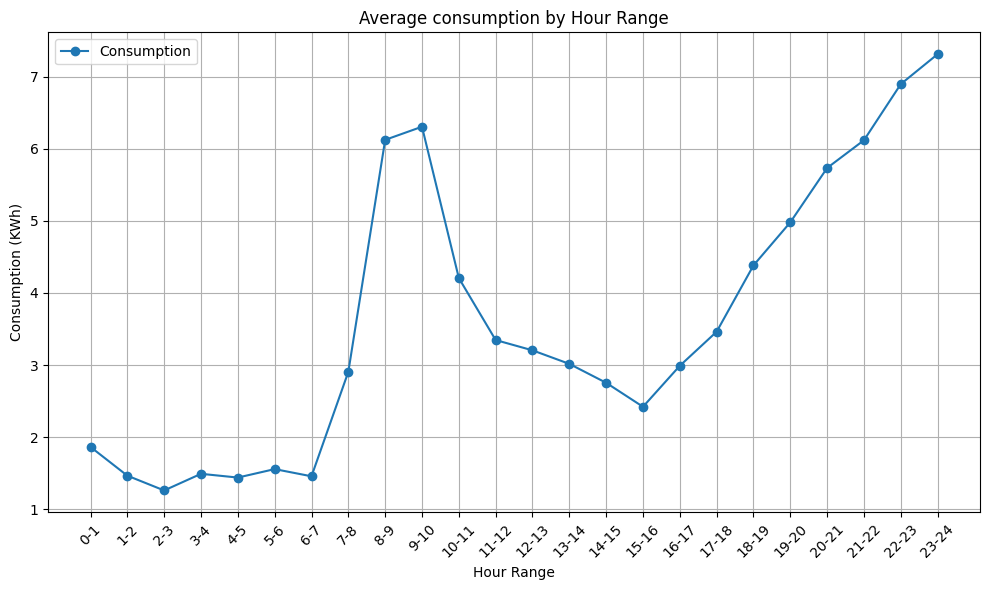

In [168]:
df_hourly_avg = df.groupby(by='hour_range')[['consumption', 'hour_start', 'hour_end']].mean().sort_values(by=['hour_start', 'hour_end'])['consumption']
plt.figure(figsize=(10, 6))
plt.plot(df_hourly_avg.index, df_hourly_avg, marker='o', linestyle='-', label='Consumption')
plt.xticks(rotation=45)
plt.xlabel('Hour Range')
plt.ylabel('Consumption (KWh)')
plt.title('Average consumption by Hour Range')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Check if all dates have all the hour ranges
ref_df = pd.DataFrame(df_hourly_avg).reset_index()
original_dates = df['date'].unique()
dates = pd.date_range(start=original_dates.min(), end=original_dates.max()).strftime('%d %b %Y')
hours = ref_df['hour_range']
full_grid = pd.MultiIndex.from_product([dates, hours], names=["date", "hour_range"]).to_frame(index=False)
merged = pd.merge(full_grid, df, on=["date", "hour_range"], how="left")
merged.isnull().sum() # No nulls

date           0
hour_range     0
consumption    0
hour_start     0
hour_end       0
dtype: int64

In [170]:
df.groupby(by=['date']).first()

,hour_range,consumption,hour_start,hour_end
date,,,,
01 Jan 2022,0-1,0.967000,0.0,1.0
02 Jan 2022,0-1,0.942667,0.0,1.0
03 Jan 2022,0-1,1.293000,0.0,1.0
04 Jan 2022,0-1,0.916000,0.0,1.0
05 Jan 2022,0-1,1.824667,0.0,1.0
06 Jan 2022,0-1,1.347333,0.0,1.0
07 Jan 2022,0-1,1.420000,0.0,1.0
08 Jan 2022,0-1,0.942000,0.0,1.0
09 Jan 2022,0-1,0.914000,0.0,1.0
